In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print train.info()
print test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
ID                11456 non-null int64
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), o

In [4]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [6]:
train['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [7]:
train['SexuponOutcome'].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

# Missing Data

In [8]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
OutcomeSubtype,13612,0.509260
Name,7691,0.287740
AgeuponOutcome,18,0.000673
SexuponOutcome,1,0.000037
Color,0,0.000000
Breed,0,0.000000
AnimalType,0,0.000000
OutcomeType,0,0.000000
DateTime,0,0.000000
AnimalID,0,0.000000


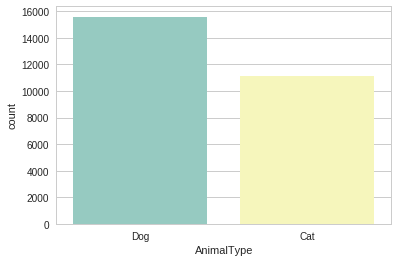

In [9]:
sns.countplot(train.AnimalType, palette='Set3')

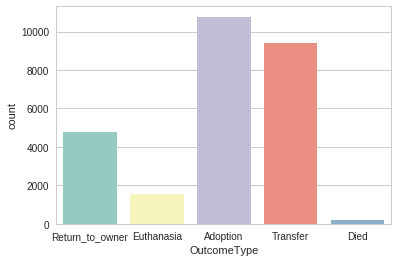

In [10]:
sns.countplot(train.OutcomeType, palette='Set3')

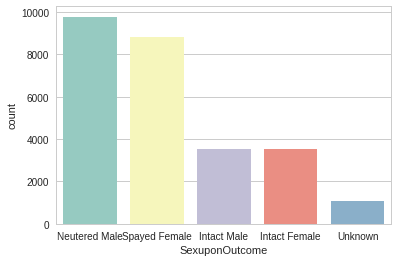

In [11]:
sns.countplot(train.SexuponOutcome, palette='Set3')

In [12]:
# functions to get new parameters from the column
def get_sex(x):
    x = str(x)
    if x.find('Male') >= 0: return 'male'
    if x.find('Female') >= 0: return 'female'
    return 'unknown'
def get_neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0: return 'neutered'
    if x.find('Neutered') >= 0: return 'neutered'
    if x.find('Intact') >= 0: return 'intact'
    return 'unknown'

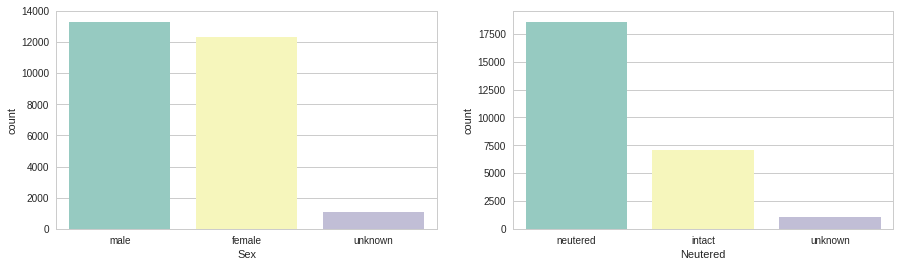

In [13]:
train['Sex'] = train.SexuponOutcome.apply(get_sex)
train['Neutered'] = train.SexuponOutcome.apply(get_neutered)
test['Sex'] = test.SexuponOutcome.apply(get_sex)
test['Neutered'] = test.SexuponOutcome.apply(get_neutered)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(train.Sex, palette='Set3', ax=ax1)
sns.countplot(train.Neutered, palette='Set3', ax=ax2)

In [14]:
train.Breed.describe()

count                      26729
unique                      1380
top       Domestic Shorthair Mix
freq                        8810
Name: Breed, dtype: object

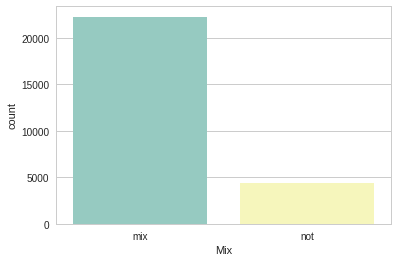

In [15]:
def get_mix(x):
    x = str(x)
    if x.find('Mix') >= 0: return 'mix'
    return 'not'
train['Mix'] = train.Breed.apply(get_mix)
test['Mix'] = test.Breed.apply(get_mix)
sns.countplot(train.Mix, palette='Set3')

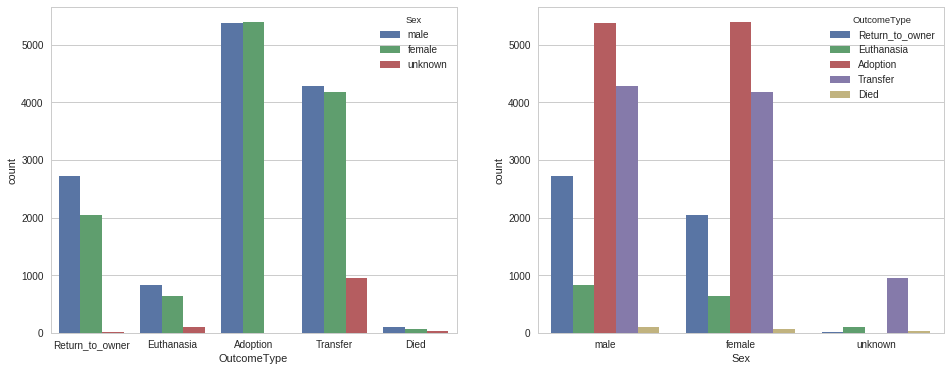

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=train, x='OutcomeType',hue='Sex', ax=ax1)
sns.countplot(data=train, x='Sex',hue='OutcomeType', ax=ax2)

两种性别的outcome type差不多

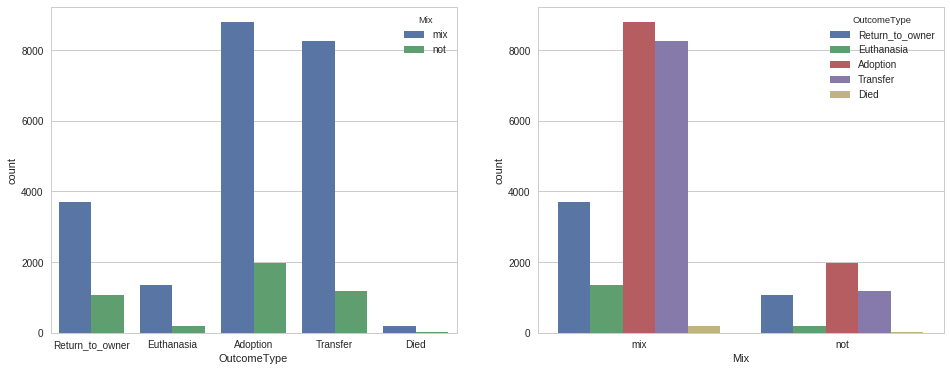

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=train, x='OutcomeType',hue='Mix', ax=ax1)
sns.countplot(data=train, x='Mix',hue='OutcomeType', ax=ax2)

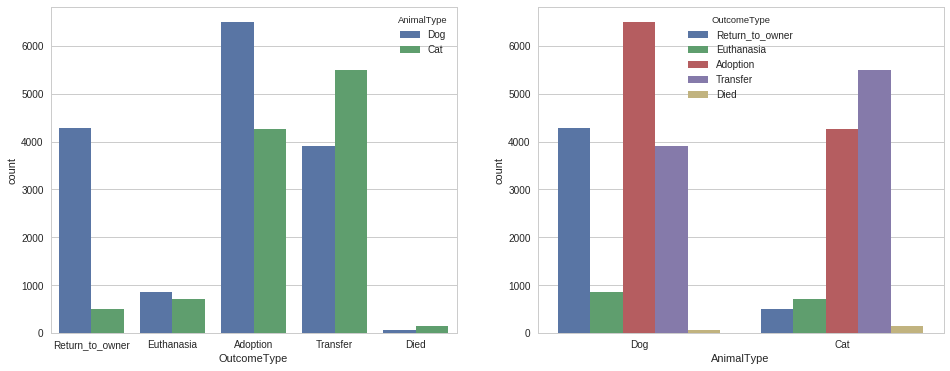

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=train, x='OutcomeType',hue='AnimalType', ax=ax1)
sns.countplot(data=train, x='AnimalType',hue='OutcomeType', ax=ax2)

狗比猫更多地被收养和还给主人

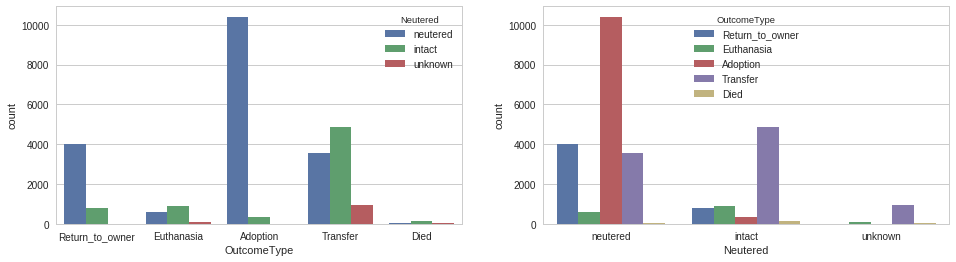

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='Neutered', ax=ax1)
sns.countplot(data=train, x='Neutered',hue='OutcomeType', ax=ax2)

In [20]:
for age in train.AgeuponOutcome[:10]:
    print age.split()[0]

1
1
2
3
2
1
3
3
5
1


Neutered动物更容易被收养

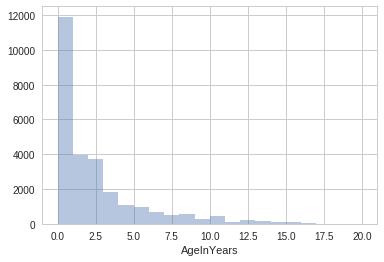

In [21]:
def calc_age_in_year(x):
    x = str(x)
    if x == 'nan': return 0
    
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    
    else: return 0

    
train['AgeInYears'] = train.AgeuponOutcome.apply(calc_age_in_year)
test['AgeInYears'] = test.AgeuponOutcome.apply(calc_age_in_year)
sns.distplot(train.AgeInYears, bins = 20, kde=False)

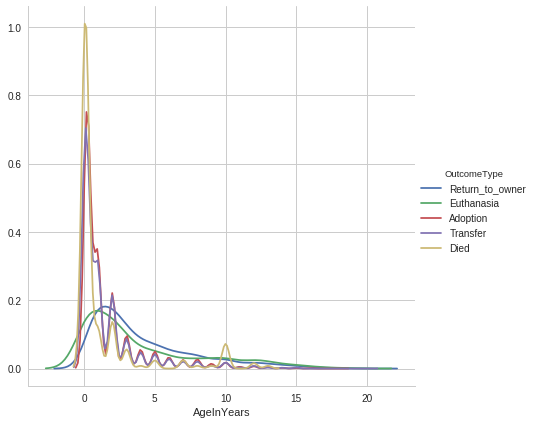

In [22]:
sns.FacetGrid(train, hue="OutcomeType", size=6) \
   .map(sns.kdeplot, "AgeInYears") \
   .add_legend()
plt.show()

In [23]:
def calc_age_category(x):
    if x < 3: return 'young'
    if x < 5: return 'young adult'
    if x < 10: return 'adult'
    return 'old'
train['AgeCategory'] = train.AgeInYears.apply(calc_age_category)
test['AgeCategory'] = test.AgeInYears.apply(calc_age_category)

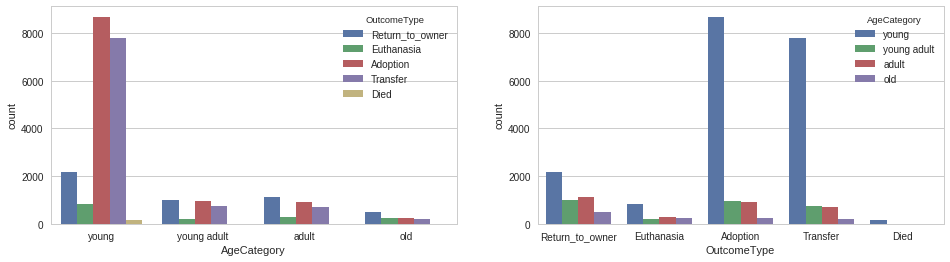

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeType',hue='AgeCategory', ax=ax2)
sns.countplot(data=train, x='AgeCategory',hue='OutcomeType', ax=ax1)

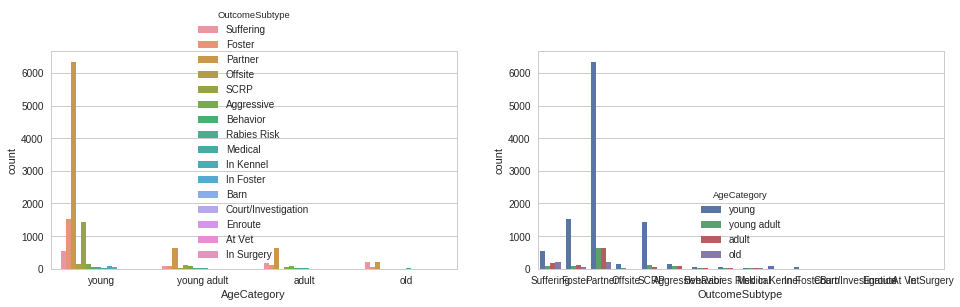

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=train, x='OutcomeSubtype',hue='AgeCategory', ax=ax2)
sns.countplot(data=train, x='AgeCategory',hue='OutcomeSubtype', ax=ax1)

In [25]:
X_train = train.drop('DateTime', axis=1).drop('AnimalID', axis=1).drop('Name', axis=1).drop('OutcomeType', axis=1) \
                .drop('SexuponOutcome', axis=1).drop('AgeuponOutcome', axis=1).drop('Breed', axis=1)

In [27]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Sex,Neutered,Mix,AgeInYears,AgeCategory
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,female,intact,mix,0.833333,young
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,female,neutered,not,2.000000,young
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,male,neutered,mix,1.000000,young
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,male,intact,mix,0.333333,young
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,male,neutered,mix,2.000000,young


In [28]:
X_test = test.drop('DateTime', axis=1).drop('ID', axis=1).drop('Name', axis=1) \
                .drop('SexuponOutcome', axis=1).drop('AgeuponOutcome', axis=1).drop('Breed', axis=1)

In [30]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,AgeInYears,OutcomeSubtype_Aggressive,OutcomeSubtype_At Vet,OutcomeSubtype_Barn,OutcomeSubtype_Behavior,OutcomeSubtype_Court/Investigation,OutcomeSubtype_Enroute,OutcomeSubtype_Foster,OutcomeSubtype_In Foster,OutcomeSubtype_In Kennel,...,Sex_unknown,Neutered_intact,Neutered_neutered,Neutered_unknown,Mix_mix,Mix_not,AgeCategory_adult,AgeCategory_old,AgeCategory_young,AgeCategory_young adult
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.057692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
